<a href="https://colab.research.google.com/github/sk48880/AV--Club-Mahindra-DataOlympics/blob/master/Club_Mahindra_DataOlympics_EDA%2C_Feature_Eng_%2C_Catboost_%26_LGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![iris](https://github.com/sk48880/AV--Club-Mahindra-DataOlympics/blob/master/av%20club%20mahindra.PNG?raw=true)

***About Club Mahindra DataOlympics***

Club Mahindra presents DataOlympics in association with Analytics Vidhya. DataOlympics reflects the data-driven culture we have in Club Mahindra where we take up the most critical and impactful business challenges and try to solve them using data insights and advanced predictive models. In our journey to become a data-driven decision making organization, we invite you to DataOlympics, our flagship hackathon to identify the best talents in the industry to work on challenging business problems.


The top performers will get an opportunity to interview with Data Science team at Club Mahindra. The team has so far developed and successfully deployed wide-range of machine learning and deep learning models like resort recommendations for members, prediction of booking cancellation to improve member experience, lead conversion propensity and many more are in the pipeline. DataOlympics is our endeavour to invite the passionate Data Scientists and Engineers to get a feel of what it looks like solving an RoI driven business problem.Seize this unique opportunity to be part of our team, who do Data Science while they travel & have fun in the world’s best resorts!

**About the Company:**

Club Mahindra Holidays is the flagship brand of Mahindra Holidays & Resorts India Ltd., (MHRIL) having a rapidly growing customer base and numerous affiliated resorts across the globe. Club Mahindra provides a range of products like Club Mahindra Holidays, Club Mahindra Fundays, Club Mahindra Bliss, Club Mahindra Experience breaks. The core of the brand is creating unforgettable experiences for families on their holiday so that every moment they spend with us, is magical.

Persistent Growth – MHRIL has a rapidly growing customer base of over 2.5 Lakh members and 58+ resorts across India

1.   **Parentage** – Mahindra Holidays & Resorts India Limited is a part of the USD 20.7 billion multinational Mahindra Group
2.   **Distinct Offerings** – With unique experiences for everyone, Club Mahindra is the most preferred holiday resort chain in India
3.   **Persistent Growth** – MHRIL has a rapidly growing customer base of over 2.5 Lakh members and 58+ resorts across India

**Problem Statement**

**Food & Beverages Spend Prediction in Club Mahindra Resorts**

Club Mahindra (Club M) makes significant revenue from Food and Beverages (F&B) sales in their resorts. The members of Club M are offered a wide variety of items in either buffet or À la carte form. Following are some benefits that the model to predict the spend by a member in their next visit to a resort will bring:

1. Predicting the F&B spend of a member in a resort would help in improving the pre-sales during resort booking through web and mobile app
2. Targeted campaigns to suit the member taste and preference of F&B
3. Providing members in the resort with a customized experience and offers
4. Help resort kitchen to plan the inventory and food quantity to be prepared in advance


Given the information related to resort, club member, reservation etc. the task is to predict average spend per room night on food and beverages for the each reservation in the test set.


**Data Description**

**train.zip**

train.zip contains train.csv and data_dictionary.csv.
1. train.csv contains the training data with details on a set of reservations with the average spend per room night
2. Data_Dictionary.xlsx contains a brief description of each variable provided in the training and test set.
 
**test.csv**

test.csv contains details of all reservations for which the participants need to predict the average spend on FnB per room night
 

**sample_submission.csv**

sample_submission.csv contains the submission format for the predictions against the test set. A single csv/zip needs to be submitted as a solution.
 

**Evaluation Metric**

Submissions are evaluated on 100 * Root Mean Squared Error (RMSE) on the variable 

# Data Dictionary

![iris](https://github.com/sk48880/AV--Club-Mahindra-DataOlympics/blob/master/data%20dictionary.PNG?raw=true)

## Authenticating the G-Drive

In [1]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 10.3MB/s 


## Importing Train and Test files from Google Drive

In [2]:
link = 'https://drive.google.com/open?id=1k7CIoWXCqaaFY21I4AiH1A3QF6Y8XjZ-' # The shareable link
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train.csv')  

link = 'https://drive.google.com/open?id=1gURo20n8zG3ks74Ubvbv37jUhKIyYggr' # The shareable link
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('test.csv')  

link = 'https://drive.google.com/open?id=1bM_kjdCxCqzResNrDzBcRxTv2rjSvY5w' # The shareable link
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('sample_submission.csv')  

1k7CIoWXCqaaFY21I4AiH1A3QF6Y8XjZ-
1gURo20n8zG3ks74Ubvbv37jUhKIyYggr
1bM_kjdCxCqzResNrDzBcRxTv2rjSvY5w


## Importing important Libraries

In [3]:
!pip install catboost

     |████████████████████████████████| 60.6MB 443kB/s 


In [4]:
import re # regex
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import HTML, display, clear_output
import time


import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)


from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score,RandomizedSearchCV
from sklearn.feature_selection import RFE, RFECV,VarianceThreshold,f_oneway
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler,Normalizer 
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet,BayesianRidge,LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone


from pprint import pprint
import math

import lightgbm as lgb
import xgboost as xgb
import catboost
from catboost import Pool, CatBoostRegressor,cv
from xgboost import XGBRegressor

import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
plotly.tools.set_credentials_file(username='iamsandy0', api_key='syakQHBH4xArn4HtL6An')
import scipy

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols,Logit

from datetime import datetime
from dateutil.relativedelta import relativedelta
import os
print(os.listdir("/content/"))

['.config', 'adc.json', 'sample_submission.csv', 'test.csv', 'train.csv', 'sample_data']


## Import Data

In [5]:
%%time
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
sub = pd.read_csv('/content/sample_submission.csv')


CPU times: user 2.31 s, sys: 146 ms, total: 2.46 s
Wall time: 2.47 s


## Data Cleaning

In [0]:
## Date formatting

train['booking_date'] = pd.to_datetime(train['booking_date'], format = '%d/%m/%y')
test['booking_date'] = pd.to_datetime(test['booking_date'], format = '%d/%m/%y')

train['checkin_date'] = pd.to_datetime(train['checkin_date'], format = '%d/%m/%y')
test['checkin_date'] = pd.to_datetime(test['checkin_date'], format = '%d/%m/%y')

train['checkout_date'] = pd.to_datetime(train['checkout_date'], format = '%d/%m/%y')
test['checkout_date'] = pd.to_datetime(test['checkout_date'], format = '%d/%m/%y')

train_index = list(train[train.checkin_date.dt.year ==2012].index)


### changing the checkin date from 2012 to 2018

for i in train_index:
  train['checkin_date'][i] = train['checkin_date'][i] + relativedelta(years=6)
  

for i in train_index:
  train['checkout_date'][i] = train['checkout_date'][i] + relativedelta(years=6)
  

  test_index = list(test[test.checkin_date.dt.year ==2012].index)

for i in test_index:
  test['checkin_date'][i] = test['checkin_date'][i] + relativedelta(years=6)
  

for i in test_index:
  test['checkout_date'][i] = test['checkout_date'][i] + relativedelta(years=6)
  

In [0]:
## There was one record where room nights was -45, changing the record to 7 as per difference between checkin and checkout date

train.loc[train.roomnights <0, 'roomnights'] = 7 

##There is only one record in train which had reservationstatusid_code as D

ind = train[train.reservationstatusid_code == 'D'].index
train.drop(index = ind, axis =0, inplace = True)
train = train.reset_index(drop = True)

### Missing Value Treatment

1. Imputed the numbers with mode of respective columns

In [0]:
## filling the missing values with 0 (state unknown)
train['state_code_residence'].fillna(value =8.0, inplace = True)
test['state_code_residence'].fillna(value =8.0, inplace = True)

## filling the missing values with 0 
train['season_holidayed_code'].fillna(value =2.0, inplace = True)
test['season_holidayed_code'].fillna(value =2.0, inplace = True)

## Plotting & Charting

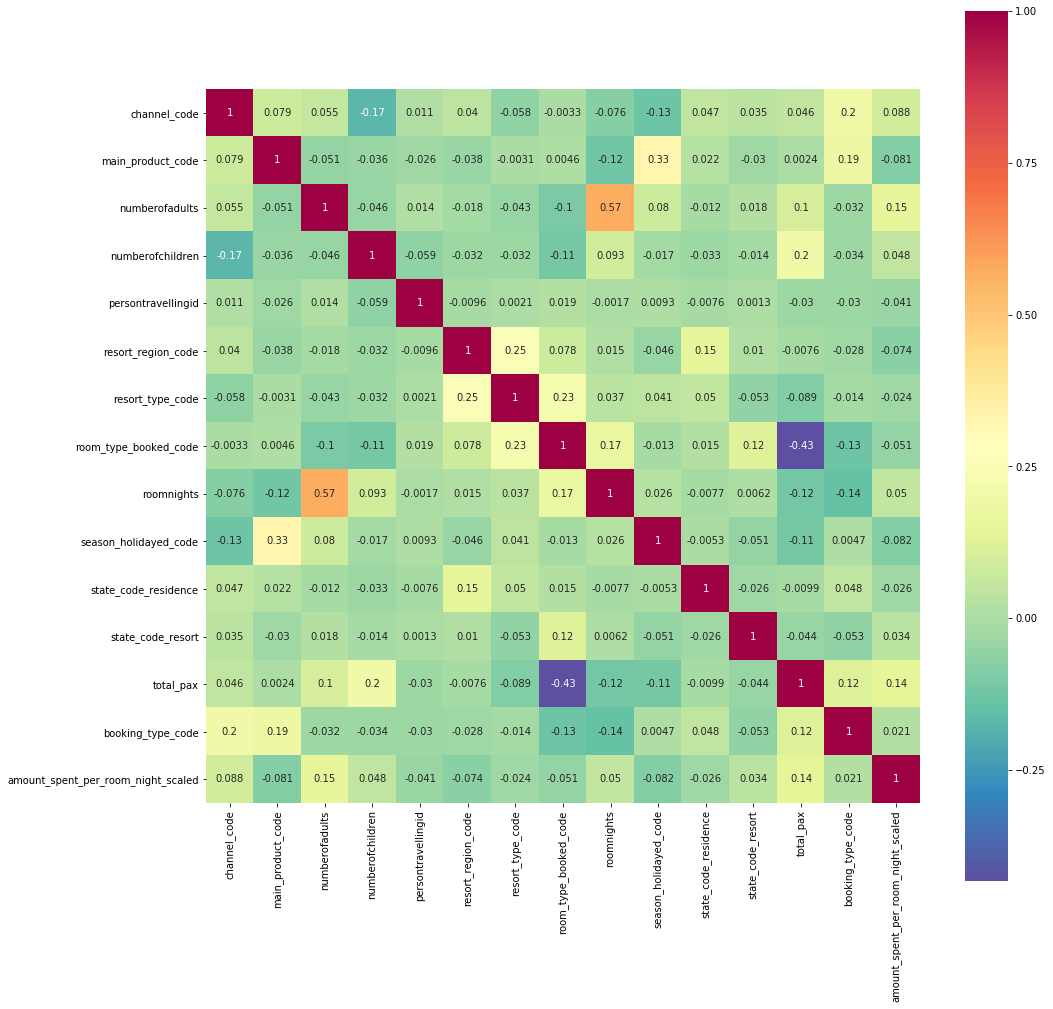

In [9]:
plt.figure(figsize = (16,16))
corr_mat = train.corr()
sns.heatmap(corr_mat, annot = True,square= True,cmap='Spectral_r')
plt.show()

In [10]:
avg_spend = train.groupby(by = 'checkin_date').mean()['amount_spent_per_room_night_scaled'].reset_index()

data = [go.Scatter(x = avg_spend.checkin_date, y=avg_spend.amount_spent_per_room_night_scaled)]

py.iplot(data, filename = 'time-series-simple')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~iamsandy0/0 or inside your plot.ly account where it is named 'time-series-simple'


In [11]:
no_booking = train.groupby(by = 'checkin_date').count()['reservation_id'].reset_index()

data = [go.Scatter(x = no_booking.checkin_date, y=no_booking.reservation_id)]

py.iplot(data, filename = 'No. of Booking')

## Feature Enginnering

In [0]:
## Date features for Booking date

train['booking_year'] = train['booking_date'].dt.year
train['booking_month'] = train['booking_date'].dt.month
train['booking_Week'] = train['booking_date'].dt.week
train['booking_Day'] = train['booking_date'].dt.day
train['booking_weeknum'] = train['booking_date'].dt.weekofyear
train['booking_dayofweek'] = train['booking_date'].dt.dayofweek
train['booking_Dayofyear'] = train['booking_date'].dt.dayofyear

test['booking_year'] = test['booking_date'].dt.year
test['booking_month'] = test['booking_date'].dt.month
test['booking_Week'] = test['booking_date'].dt.week
test['booking_Day'] = test['booking_date'].dt.day
test['booking_weeknum'] = test['booking_date'].dt.weekofyear
test['booking_dayofweek'] = test['booking_date'].dt.dayofweek
test['booking_Dayofyear'] = test['booking_date'].dt.dayofyear

In [0]:
## Total person travelling as sum of adult count and children count

train['total_nbr_ppl'] = train['numberofadults'] + train['numberofchildren']
test['total_nbr_ppl'] = test['numberofadults'] + test['numberofchildren']

In [0]:

## Date difference features between checkin and checkout date

train['prior_booking'] = (train['checkin_date'] - train['booking_date']).dt.days
test['prior_booking'] = (test['checkin_date'] - test['booking_date']).dt.days

train['length_of_stay'] = (train['checkout_date'] - train['checkin_date']).dt.days 
test['length_of_stay'] = (test['checkout_date'] - test['checkin_date']).dt.days

train['prior_booking_week'] = ((train['checkin_date'] - train['booking_date']).dt.days)/7
train['prior_booking_week'] = train['prior_booking_week'].apply(lambda x: math.ceil(x))

test['prior_booking_week'] = ((test['checkin_date'] - test['booking_date']).dt.days)/7
test['prior_booking_week'] = test['prior_booking_week'].apply(lambda x: math.ceil(x))


train['prior_booking_month'] = ((train['checkin_date'] - train['booking_date']).dt.days)/30
train['prior_booking_month'] = train['prior_booking_month'].apply(lambda x: math.ceil(x))

test['prior_booking_month'] = ((test['checkin_date'] - test['booking_date']).dt.days)/30
test['prior_booking_month'] = test['prior_booking_month'].apply(lambda x: math.ceil(x))

In [0]:
## Date features for checkin date

train['checking_year'] = train['checkin_date'].dt.year
test['checking_year'] = test['checkin_date'].dt.year

train['checking_month'] = train['checkin_date'].dt.month
test['checking_month'] = test['checkin_date'].dt.month

train['checking_day'] = train['checkin_date'].dt.day
test['checking_day'] = test['checkin_date'].dt.day

train['checking_weekday'] = train['checkin_date'].dt.weekday_name
test['checking_weekday'] = test['checkin_date'].dt.weekday_name

train['is_year_end_checkin'] = train['checkin_date'].dt.is_year_end
test['is_year_end_checkin'] = test['checkin_date'].dt.is_year_end


train['is_year_start_checkin'] = train['checkin_date'].dt.is_year_start
test['is_year_start_checkin'] = test['checkin_date'].dt.is_year_start


train['is_month_end_checkin'] = train['checkin_date'].dt.is_month_end
test['is_month_end_checkin'] = test['checkin_date'].dt.is_month_end


train['is_month_start_checkin'] = train['checkin_date'].dt.is_month_start
test['is_month_start_checkin'] = test['checkin_date'].dt.is_month_start

## imputing the rows where we have issues in prior booking with median prior booking day of 33 days

train.loc[train.prior_booking <0, 'prior_booking'] = 33

#### Created feature for memberid

1. Total no. of booking 
2. Total days of stay
3. Avg days of stay
4. Avg no. of person who stays

In [0]:
nbr_booking_train = train.groupby(by = 'memberid').count()[['reservation_id']].reset_index()
nbr_booking_train.columns = ['memberid','nbr_booking']

train = train.merge(nbr_booking_train, on= 'memberid')

nbr_booking_test = test.groupby(by = 'memberid').count()[['reservation_id']].reset_index()
nbr_booking_test.columns = ['memberid','nbr_booking']

test = test.merge(nbr_booking_test, on= 'memberid')

nbr_booking_train = train.groupby(by = 'memberid').sum()[['length_of_stay']].reset_index()
nbr_booking_train.columns = ['memberid','total_stay_days']

train = train.merge(nbr_booking_train, on= 'memberid')

nbr_booking_test = test.groupby(by = 'memberid').sum()[['length_of_stay']].reset_index()
nbr_booking_test.columns = ['memberid','total_stay_days']

test = test.merge(nbr_booking_test, on= 'memberid')


nbr_booking_train = train.groupby(by = 'memberid').mean()[['length_of_stay']].reset_index()
nbr_booking_train.columns = ['memberid','avg_stay_days']

train = train.merge(nbr_booking_train, on= 'memberid')

nbr_booking_test = test.groupby(by = 'memberid').mean()[['length_of_stay']].reset_index()
nbr_booking_test.columns = ['memberid','avg_stay_days']

test = test.merge(nbr_booking_test, on= 'memberid')


nbr_booking_train = train.groupby(by = 'memberid').mean()[['numberofadults']].reset_index()
nbr_booking_train.columns = ['memberid','avg_numberofadults']

train = train.merge(nbr_booking_train, on= 'memberid')

nbr_booking_test = test.groupby(by = 'memberid').mean()[['numberofadults']].reset_index()
nbr_booking_test.columns = ['memberid','avg_numberofadults']

test = test.merge(nbr_booking_test, on= 'memberid')



nbr_booking_train = train.groupby(by = 'memberid').mean()[['total_nbr_ppl']].reset_index()
nbr_booking_train.columns = ['memberid','avg_total_nbr_ppl']

train = train.merge(nbr_booking_train, on= 'memberid')

nbr_booking_test = test.groupby(by = 'memberid').mean()[['total_nbr_ppl']].reset_index()
nbr_booking_test.columns = ['memberid','avg_total_nbr_ppl']

test = test.merge(nbr_booking_test, on= 'memberid')

In [0]:
## delete reservation id columns

train.drop(columns='reservation_id', axis =1, inplace= True)
test.drop(columns='reservation_id', axis =1, inplace= True)

## delete date columns

train.drop(columns=['booking_date','checkin_date','checkout_date'], axis =1, inplace= True)
test.drop(columns=['booking_date','checkin_date','checkout_date'], axis =1, inplace= True)

## delete member id columns

train.drop(columns='memberid', axis =1, inplace= True)
test.drop(columns='memberid', axis =1, inplace= True)

In [18]:
train.columns.values

array(['channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence',
       'state_code_resort', 'total_pax', 'member_age_buckets',
       'booking_type_code', 'cluster_code', 'reservationstatusid_code',
       'resort_id', 'amount_spent_per_room_night_scaled', 'booking_year',
       'booking_month', 'booking_Week', 'booking_Day', 'booking_weeknum',
       'booking_dayofweek', 'booking_Dayofyear', 'total_nbr_ppl',
       'prior_booking', 'length_of_stay', 'prior_booking_week',
       'prior_booking_month', 'checking_year', 'checking_month',
       'checking_day', 'checking_weekday', 'is_year_end_checkin',
       'is_year_start_checkin', 'is_month_end_checkin',
       'is_month_start_checkin', 'nbr_booking', 'total_stay_days',
       'avg_stay_days', 'avg_numberofadults', 'avg_total_nbr_ppl'],
      dtyp

In [0]:
## Created data for baseline linear model

df_train = pd.get_dummies(train)
df_test = pd.get_dummies(test)

In [0]:
## Listing out categorical columns

categ_column = ['channel_code','main_product_code','persontravellingid','resort_region_code','resort_type_code','room_type_booked_code',
                'season_holidayed_code','cluster_code','reservationstatusid_code','resort_id','state_code_residence','state_code_resort',
                'member_age_buckets','booking_type_code','booking_year','booking_month', 'booking_Week', 'booking_Day', 'booking_weeknum',
                'booking_dayofweek', 'booking_Dayofyear', 'total_nbr_ppl','prior_booking', 'length_of_stay', 'checking_year',
                'checking_month', 'checking_day', 'checking_weekday','is_year_end_checkin', 'is_year_start_checkin',
                'is_month_end_checkin', 'is_month_start_checkin','prior_booking_week', 'prior_booking_month']


In [0]:
## Converted the categ columns to object data type for Catboost regressor

for i in categ_column:
  train[i] = train[i].astype('object')
  test[i] = test[i].astype('object')

# Modelling

## Linear Baseline

In [20]:
print('Shape of train date', df_train.shape)
print('Shape of test date', df_test.shape)

Shape of train date (341423, 97)
Shape of test date (146765, 96)


In [0]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, df_train.drop('amount_spent_per_room_night_scaled', axis =1).values, df_train.amount_spent_per_room_night_scaled, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

### Lasso Regression

In [24]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 1.0045 (0.0317)



In [0]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [26]:
lasso.fit(df_train.drop('amount_spent_per_room_night_scaled', axis =1).values, df_train.amount_spent_per_room_night_scaled)
lasso_train_pred = lasso.predict(df_train.drop('amount_spent_per_room_night_scaled', axis =1).values)
lasso_pred = lasso.predict(df_test.values)
print(rmsle(df_train.amount_spent_per_room_night_scaled, lasso_train_pred))

1.004254850428798


In [27]:
sub_lasso = sub.copy()
sub_lasso['amount_spent_per_room_night_scaled'] = lasso_pred
sub_lasso.to_csv('catboost_pred.csv', index = False)
sub_lasso.head()

,reservation_id,amount_spent_per_room_night_scaled
0,7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d...,7.914781
1,fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb...,7.164185
2,540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e...,7.394305
3,09593c907ae262e46f655b4db9e14f54a19eadcfdd2679...,7.719569
4,f4c50caac68051faf37551d70bb17eebef2a20e2244cb1...,7.588560


#### Public LB  Score: ~99.5 (Top 55% on Public LB)

## Modelling - Catboost Regressor

In [0]:
x_train,x_test,y_train,y_test = train_test_split(train.drop('amount_spent_per_room_night_scaled',1),train.amount_spent_per_room_night_scaled, test_size = 0.2,
                                                random_state = 320)

In [0]:
_train = Pool(x_train, label=y_train,cat_features= categ_column)
_valid = Pool(x_test, label=y_test,cat_features= categ_column)

In [0]:
model = CatBoostRegressor(
                          learning_rate=0.02,
                          subsample = 0.9,
                          l2_leaf_reg = 10,
                          max_depth=7,
                          iterations=25000, 
                          loss_function='RMSE',
                          task_type = 'GPU',
                          bootstrap_type= 'Bernoulli',
                          min_data_in_leaf	= 100,
                          random_seed = 42
                          ) 

In [0]:
fit_model = model.fit(_train,verbose_eval=1000, early_stopping_rounds=500,
                      eval_set=[_valid],use_best_model=True,plot=False)

0:	learn: 7.6426048	test: 7.6521835	best: 7.6521835 (0)	total: 102ms	remaining: 42m 19s
1000:	learn: 0.9707994	test: 0.9719626	best: 0.9719626 (1000)	total: 1m 19s	remaining: 31m 35s
2000:	learn: 0.9618595	test: 0.9697957	best: 0.9697955 (1999)	total: 2m 33s	remaining: 29m 23s
3000:	learn: 0.9555775	test: 0.9686971	best: 0.9686959 (2999)	total: 3m 47s	remaining: 27m 44s
4000:	learn: 0.9501153	test: 0.9680375	best: 0.9680361 (3989)	total: 5m 1s	remaining: 26m 20s
5000:	learn: 0.9447461	test: 0.9675977	best: 0.9675949 (4982)	total: 6m 13s	remaining: 24m 51s
6000:	learn: 0.9394888	test: 0.9672508	best: 0.9672508 (6000)	total: 7m 24s	remaining: 23m 27s
7000:	learn: 0.9344066	test: 0.9669349	best: 0.9669332 (6995)	total: 8m 36s	remaining: 22m 6s
8000:	learn: 0.9295537	test: 0.9667715	best: 0.9667655 (7986)	total: 9m 49s	remaining: 20m 52s
9000:	learn: 0.9245665	test: 0.9665764	best: 0.9665552 (8800)	total: 11m	remaining: 19m 34s
10000:	learn: 0.9197231	test: 0.9663992	best: 0.9663904 (9870)

In [0]:
predictions = fit_model.predict(test)

In [0]:
sub_cat = sub.copy()
sub_cat['amount_spent_per_room_night_scaled'] = predictions
sub_cat.to_csv('catboost_pred.csv', index = False)
sub_cat.head()

,reservation_id,amount_spent_per_room_night_scaled
0,7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d...,8.186866
1,fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb...,7.475356
2,540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e...,7.607371
3,09593c907ae262e46f655b4db9e14f54a19eadcfdd2679...,7.887794
4,f4c50caac68051faf37551d70bb17eebef2a20e2244cb1...,7.871251


In [0]:
sub_cat.describe()

,amount_spent_per_room_night_scaled
count,146765.000000
mean,7.754966
std,0.495519
min,5.971099
25%,7.416364
50%,7.727817
75%,8.063670
max,10.196219


#### Feature Importance

In [0]:
## Top 10 features
fimp = pd.DataFrame.from_dict({'Columns':fit_model.feature_names_,'Value':fit_model.feature_importances_})
fimp = fimp.sort_values(by = 'Value', ascending = False)
fimp.head()

,Columns,Value
27,length_of_stay,11.630622
8,roomnights,8.090799
17,resort_id,7.571421
25,total_nbr_ppl,5.909815
12,total_pax,5.031613
4,persontravellingid,4.844285
10,state_code_residence,3.483706
1,main_product_code,3.193469
41,avg_numberofadults,2.729273
13,member_age_buckets,2.617151


## LightGBM Regressor

In [0]:
lgb_train = df_train.copy()
lgb_test = df_test.copy()

In [0]:
x_train,x_test,y_train,y_test = train_test_split(lgb_train.drop('amount_spent_per_room_night_scaled',1), lgb_train.amount_spent_per_room_night_scaled, test_size = 0.2,
                                                random_state = 42)

In [0]:
# Model parameters
lgb_params = {
    "objective" : "regression",
    "metric" : "rmse",
    "boosting": 'gbdt',
    "max_depth" : 8,
    "sub_sample":0.8,
    "num_leaves" : 31,
    "learning_rate" : 0.01,
    "seed": 42}

In [0]:
lgb_categ_columns = ['channel_code', 'main_product_code', 'persontravellingid', 'resort_region_code','resort_type_code', 'room_type_booked_code',
                     'season_holidayed_code', 'state_code_residence', 'state_code_resort','booking_type_code','booking_year', 'booking_month',
                     'booking_Week', 'booking_Day','booking_weeknum', 'booking_dayofweek', 'booking_Dayofyear','checking_year','checking_month', 
                     'checking_day', 'is_year_end_checkin','is_year_start_checkin', 'is_month_end_checkin','is_month_start_checkin']

In [0]:
trn_data = lgb.Dataset(x_train, label=y_train,categorical_feature= lgb_categ_columns)
val_data = lgb.Dataset(x_test, label=y_test,categorical_feature= lgb_categ_columns)

In [0]:
clf = lgb.train(lgb_params, trn_data, num_boost_round= 20000, valid_sets = [trn_data, val_data], verbose_eval=500, 
                early_stopping_rounds = 500)

Training until validation scores don't improve for 1200 rounds.
[500]	training's rmse: 0.964933	valid_1's rmse: 0.9914
[1000]	training's rmse: 0.941869	valid_1's rmse: 0.987998
[1500]	training's rmse: 0.927305	valid_1's rmse: 0.988365
[2000]	training's rmse: 0.916259	valid_1's rmse: 0.989363
Early stopping, best iteration is:
[1138]	training's rmse: 0.937407	valid_1's rmse: 0.98796


In [0]:
pred_lgb = clf.predict(lgb_test, num_iteration=clf.best_iteration)

In [0]:
sub_lgb = sub.copy()
sub_lgb["amount_spent_per_room_night_scaled"] = pred_lgb
sub_lgb.to_csv("submission_lgb.csv", index=False)
sub_lgb.head()

,reservation_id,amount_spent_per_room_night_scaled
0,7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d...,8.172590
1,fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb...,7.429915
2,540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e...,7.635920
3,09593c907ae262e46f655b4db9e14f54a19eadcfdd2679...,7.642648
4,f4c50caac68051faf37551d70bb17eebef2a20e2244cb1...,7.781631


In [0]:
sub_lgb.describe()

,amount_spent_per_room_night_scaled
count,146765.000000
mean,7.722577
std,0.460222
min,5.809319
25%,7.404219
50%,7.706334
75%,8.017533
max,9.644610


## K-Fold Cross Validation

In [0]:
 def run_cat(model,  trt, tst, tar,n_splits=10, plot=False):   
    kf = KFold(n_splits=n_splits, random_state=320, shuffle=True)
    oof = np.zeros(len(trt))
    feature_importance_df = pd.DataFrame()
    y_valid_pred = 0 * tar
    y_test_pred = 0
    for n_fold, (train_index, valid_index) in enumerate(kf.split(trt, tar)):
        y_train, y_valid = tar.iloc[train_index], tar.iloc[valid_index]
        X_train, X_valid = trt.iloc[train_index,:], trt.iloc[valid_index,:]
        _train = Pool(X_train, label=y_train,cat_features= categ_column)
        _valid = Pool(X_valid, label=y_valid,cat_features= categ_column)
        print( "Fold ", n_fold)
        fit_model = model.fit(_train,
                              verbose_eval=1000, 
                              early_stopping_rounds=500,
                              eval_set=[_valid],
                              use_best_model=True,
                              plot=False,
                                            
                             )
        pred = fit_model.predict(X_valid)
        oof[valid_index] = pred
        print( "RMSE = ",np.sqrt( mean_squared_error(y_valid, pred)))
        y_valid_pred.iloc[valid_index] = pred
        y_test_pred += fit_model.predict(tst)
    y_test_pred /= n_splits
    print("Average RMSE:", np.sqrt(mean_squared_error(tar, oof)))
    return y_test_pred, oof

In [0]:
cat_train = train.drop('amount_spent_per_room_night_scaled',axis =1)
cat_target = train.amount_spent_per_room_night_scaled
cat_test = test.copy()

In [0]:
y_test_pred, oof = run_cat(model,cat_train, cat_test, cat_target)

In [0]:
sub_df = sub.copy()
sub_df["amount_spent_per_room_night_scaled"] = y_test_pred
sub_df.to_csv("submission_kfold.csv", index=False)
sub_df.head()

In [0]:
sub_df.describe()

## K -fold Public LB : 0.9606

Averaging Catboost K-fold and Lightgbm gives **0.9603 on Public LB   and 0.9709 on Prival LB**

### Summary:

